In [108]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [109]:
audiopath = 'music/Thangapoovey.mp3'
y, sr = librosa.load(audiopath, sr=22050)
y.size

[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?


5193216

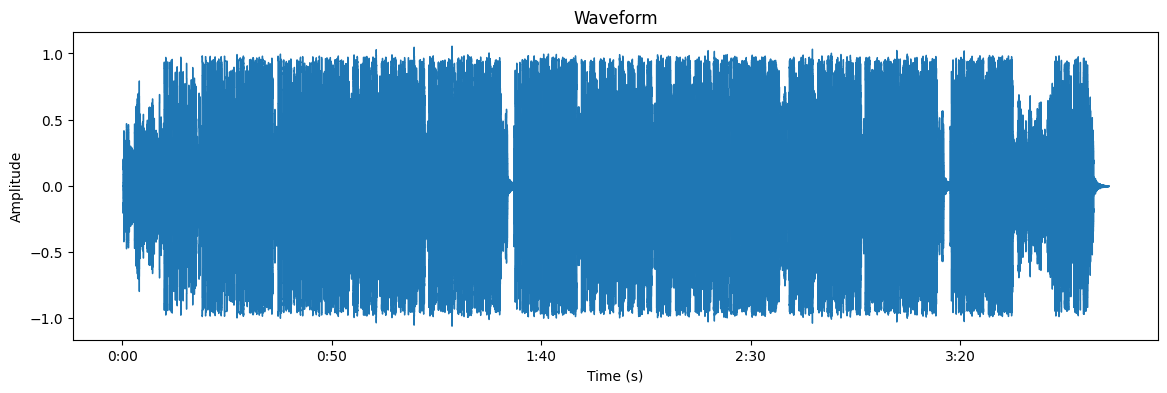

In [110]:
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

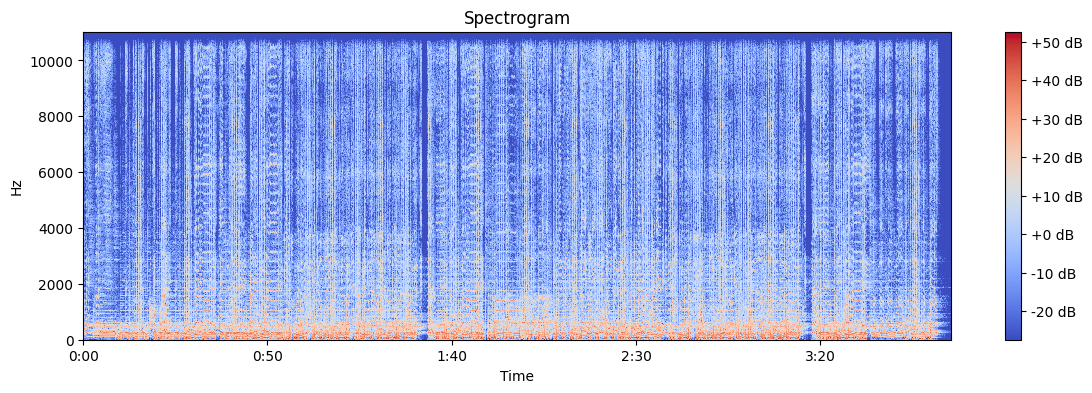

In [111]:
X = librosa.stft(y)
X_db = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(14, 4))
librosa.display.specshow(X_db, sr=sr, x_axis='time', y_axis='hz')
plt.title("Spectrogram")
plt.colorbar(format="%+2.f dB")
plt.show()

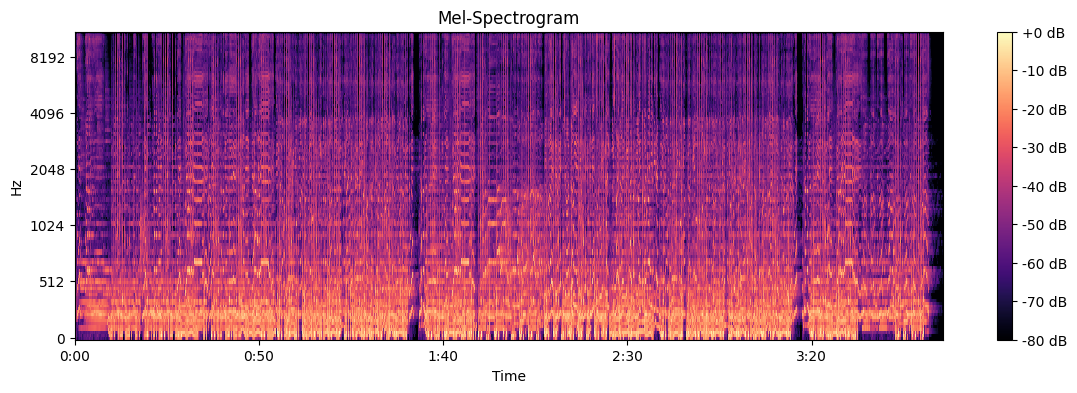

In [112]:
mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_db = librosa.power_to_db(mel, ref=np.max)

plt.figure(figsize=(14, 4))
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel')
plt.title("Mel-Spectrogram")
plt.colorbar(format="%+2.f dB")
plt.show()

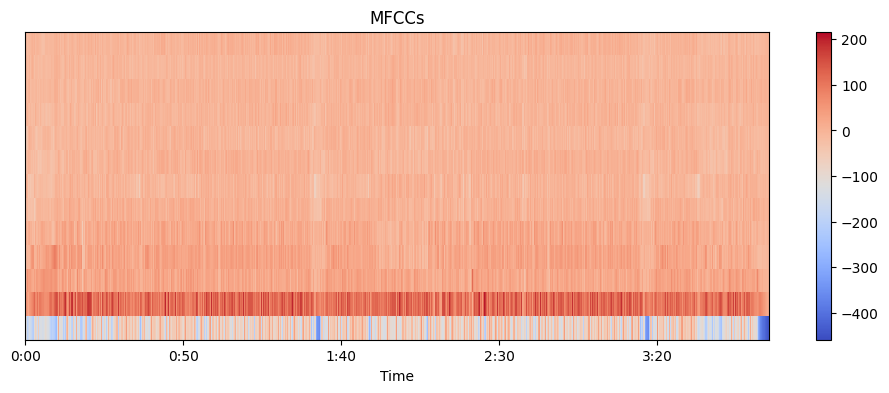

In [113]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title("MFCCs")
plt.show()


In [114]:
# Harmonic–Percussive split
y_harm, y_perc = librosa.effects.hpss(y)


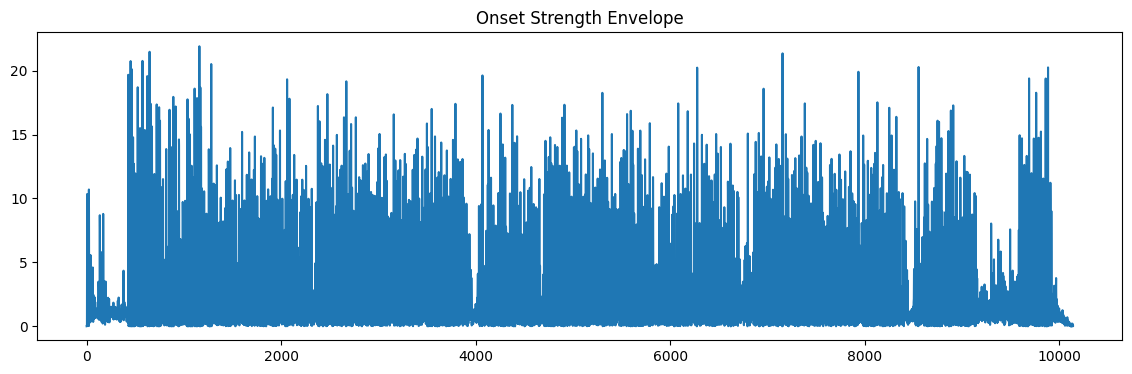

In [115]:

onset_env = librosa.onset.onset_strength(y=y_perc, sr=sr)
plt.figure(figsize=(14,4))
plt.plot(onset_env)
plt.title("Onset Strength Envelope")
plt.show()


In [116]:
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
print("Tempo:", tempo)
print("Beat positions (frames):", beats)
beats.shape

Tempo: [107.66601562]
Beat positions (frames): [   5   29   53   76  100  123  147  170  195  218  241  264  287  311
  334  357  380  404  428  452  477  501  525  549  574  598  623  647
  671  696  720  745  769  794  818  842  867  891  915  940  964  988
 1013 1037 1062 1086 1110 1135 1159 1184 1208 1232 1256 1281 1306 1330
 1354 1379 1403 1427 1452 1476 1500 1525 1549 1575 1598 1622 1647 1671
 1695 1720 1744 1768 1793 1817 1842 1866 1891 1915 1939 1963 1988 2012
 2037 2061 2085 2110 2134 2159 2183 2207 2232 2256 2281 2305 2329 2353
 2378 2403 2427 2451 2475 2500 2524 2549 2573 2597 2622 2646 2670 2695
 2719 2744 2768 2792 2817 2841 2866 2890 2915 2939 2963 2988 3012 3036
 3061 3085 3109 3134 3158 3183 3207 3231 3255 3280 3305 3329 3353 3378
 3402 3426 3451 3475 3499 3524 3548 3573 3597 3621 3646 3670 3695 3719
 3743 3767 3792 3816 3841 3865 3890 3914 3937 3962 3986 4011 4035 4060
 4084 4109 4133 4158 4182 4206 4231 4255 4279 4304 4328 4353 4377 4401
 4426 4450 4475 4499 4523 4547

(408,)

In [117]:
beat_times = librosa.frames_to_time(beats, sr=sr)
print(beat_times)


[1.16099773e-01 6.73378685e-01 1.23065760e+00 1.76471655e+00
 2.32199546e+00 2.85605442e+00 3.41333333e+00 3.94739229e+00
 4.52789116e+00 5.06195011e+00 5.59600907e+00 6.13006803e+00
 6.66412698e+00 7.22140590e+00 7.75546485e+00 8.28952381e+00
 8.82358277e+00 9.38086168e+00 9.93814059e+00 1.04954195e+01
 1.10759184e+01 1.16331973e+01 1.21904762e+01 1.27477551e+01
 1.33282540e+01 1.38855329e+01 1.44660317e+01 1.50233107e+01
 1.55805896e+01 1.61610884e+01 1.67183673e+01 1.72988662e+01
 1.78561451e+01 1.84366440e+01 1.89939229e+01 1.95512018e+01
 2.01317007e+01 2.06889796e+01 2.12462585e+01 2.18267574e+01
 2.23840363e+01 2.29413152e+01 2.35218141e+01 2.40790930e+01
 2.46595918e+01 2.52168707e+01 2.57741497e+01 2.63546485e+01
 2.69119274e+01 2.74924263e+01 2.80497052e+01 2.86069841e+01
 2.91642630e+01 2.97447619e+01 3.03252608e+01 3.08825397e+01
 3.14398186e+01 3.20203175e+01 3.25775964e+01 3.31348753e+01
 3.37153741e+01 3.42726531e+01 3.48299320e+01 3.54104308e+01
 3.59677098e+01 3.657142

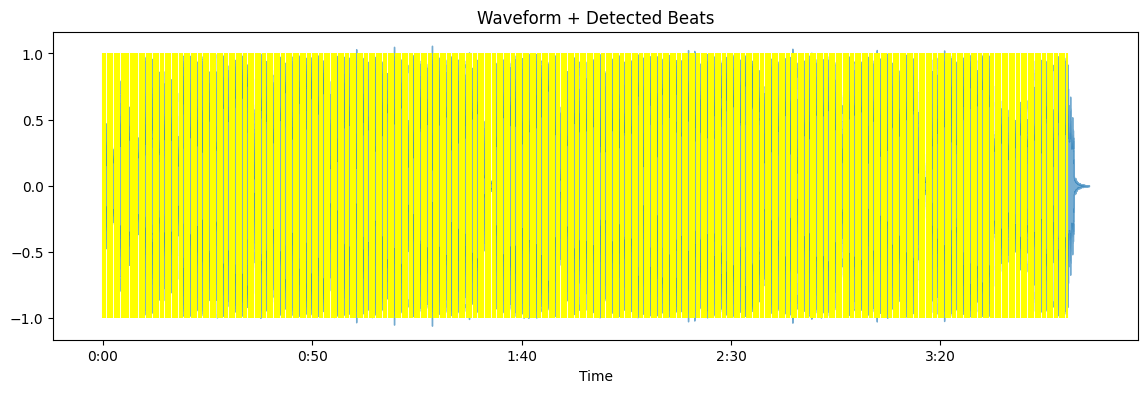

In [118]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.vlines(beat_times, -1, 1, color='yellow', label='Beats')
plt.title("Waveform + Detected Beats")
plt.show()


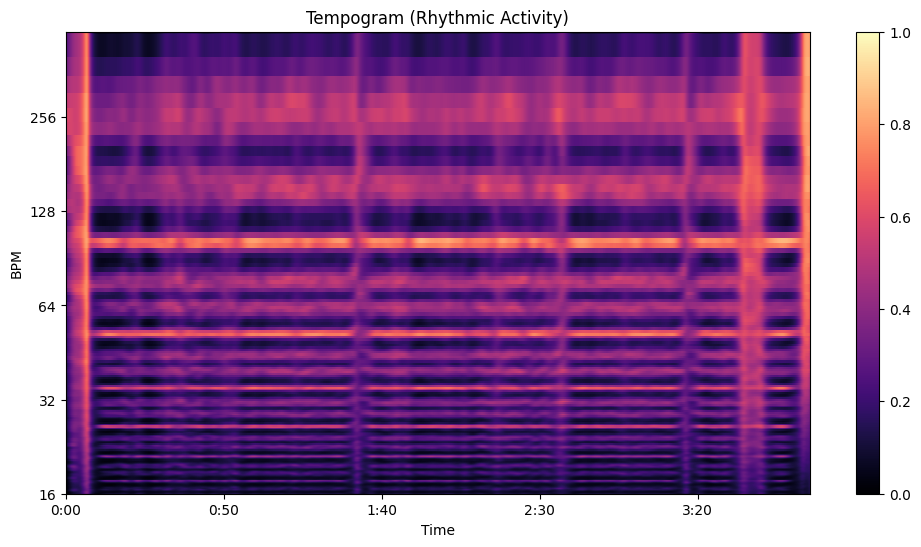

In [119]:
tempogram = librosa.feature.tempogram(onset_envelope=onset_env, sr=sr)
plt.figure(figsize=(12, 6))
librosa.display.specshow(tempogram, sr=sr, x_axis='time', y_axis='tempo')
plt.title("Tempogram (Rhythmic Activity)")
plt.colorbar()
plt.show()


In [120]:
ibi = np.diff(beat_times)   # inter-beat intervals
rhythm_stability = 1 / np.std(ibi)
print("Rhythm Stability:", rhythm_stability)


Rhythm Stability: 77.13145348175487


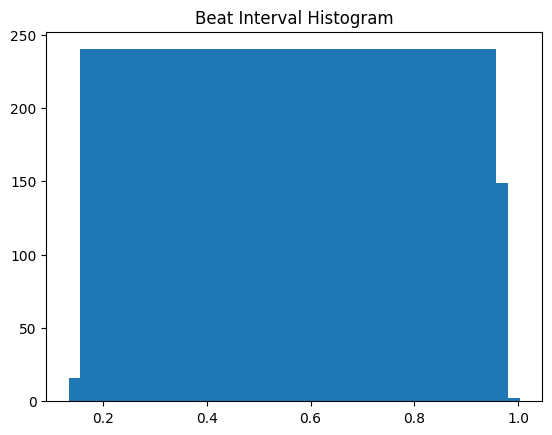

In [121]:
hist, bins = np.histogram(ibi, bins=50)
plt.bar(bins[:-1], hist)
plt.title("Beat Interval Histogram")
plt.show()


In [122]:
beat_strength = np.mean(onset_env) / np.max(onset_env)
beat_strength = float(np.clip(beat_strength, 0, 1))
beat_times = librosa.frames_to_time(beats, sr=sr)

In [123]:
if len(beat_times) > 2:
    ibi = np.diff(beat_times)           # inter-beat intervals
    rhythm_stability = 1 / (np.std(ibi) + 1e-6)
    rhythm_stability = float(np.clip(rhythm_stability, 0, 1))
else:
    rhythm_stability = 0


In [124]:
ideal_min, ideal_max = 100, 130
if tempo < ideal_min:
    tempo_suitability = tempo / ideal_min
elif tempo > ideal_max:
    tempo_suitability = ideal_max / tempo
else:
    tempo_suitability = 1.0

tempo_suitability = float(np.clip(tempo_suitability, 0, 1))


In [125]:
rms = librosa.feature.rms(y=y_perc)[0]
energy_pulse = np.std(rms) / np.mean(rms)
energy_pulse = float(np.clip(energy_pulse, 0, 1))


In [126]:
danceability = (
    0.35 * beat_strength +
    0.25 * tempo_suitability +
    0.20 * rhythm_stability +
    0.20 * energy_pulse
)

danceability = float(np.clip(danceability, 0, 1))
print("Danceability:", danceability)


Danceability: 0.6408813197165728
